# GBSV Mini-Challenge 1 Notebook 2

## Day 4

### Daten
Für die Analyse benötige ich Daten, welche ein wiederkehrendes Muster aufweisen. In den letzten Tagen habe ich mich mit den Wasserstandsdaten des St.-Lawrence Stroms in Montreal beschäftigt. Diese Daten sind stündlich über mehrere Jahre verfügbar und weisen ein Muster auf, welches Jährlich wiederkehrt.

![Hafen von Montreal im Winter](images/hafen_montreal_winter.jpg)  
*Alter Hafen von Montreal im Winter*

### Autokorrelation über alle Jahre

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import correlate, find_peaks


# Einlesen der CSV-Datei
water_raw = pd.read_csv(
    "data/st_lawrence_water.csv",
    skiprows=8, 
    usecols=[0, 1],                # nur die ersten beiden Spalten laden
    names=["Observed_date", "Sealevel"],    # Spaltennamen setzen
    parse_dates=["Observed_date"],      # Datum parsen
    encoding="latin1"
)

print(water_raw.head())

        Observed_date  Sealevel
0 2015-01-01 00:00:00      0.32
1 2015-01-01 01:00:00      0.32
2 2015-01-01 02:00:00      0.33
3 2015-01-01 03:00:00      0.33
4 2015-01-01 04:00:00      0.33


(-0.29, 3.29)

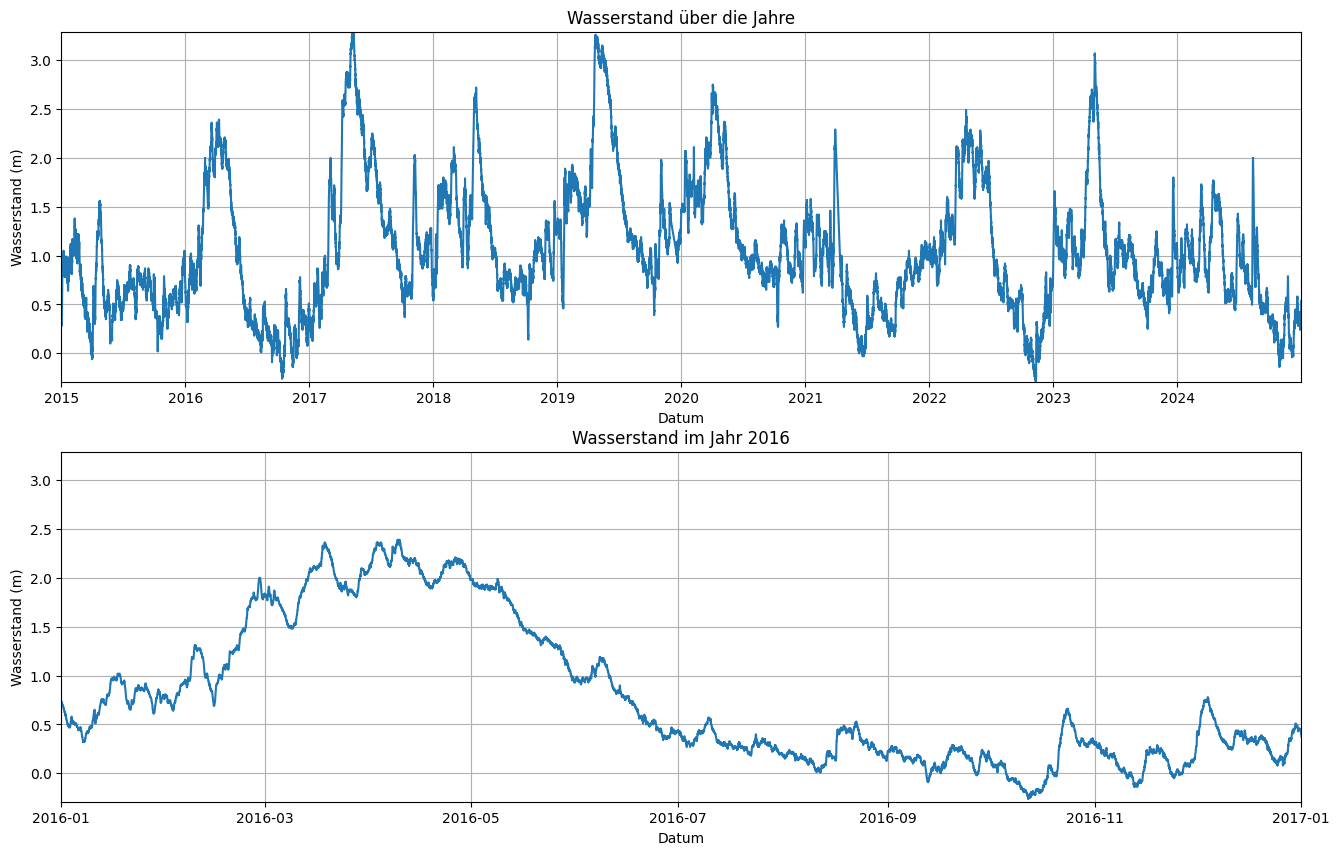

In [25]:
# Plotten der Daten einmal über die ganzen Jahre und für ein Jahr
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(water_raw["Observed_date"], water_raw["Sealevel"])
plt.title("Wasserstand über die Jahre")
plt.xlabel("Datum")
plt.ylabel("Wasserstand (m)")
plt.grid()
plt.xlim([water_raw["Observed_date"].min(), water_raw["Observed_date"].max()])
plt.ylim([water_raw["Sealevel"].min(), water_raw["Sealevel"].max()])
plt.subplot(2, 1, 2)
plt.plot(water_raw["Observed_date"], water_raw["Sealevel"])
plt.title("Wasserstand im Jahr 2016")
plt.xlabel("Datum")
plt.ylabel("Wasserstand (m)")
plt.grid()
plt.xlim([pd.Timestamp("2016-01-01"), pd.Timestamp("2017-01-01")])
plt.ylim([water_raw["Sealevel"].min(), water_raw["Sealevel"].max()])

<span style="background-color:yellow">Plot Optimiert</span>

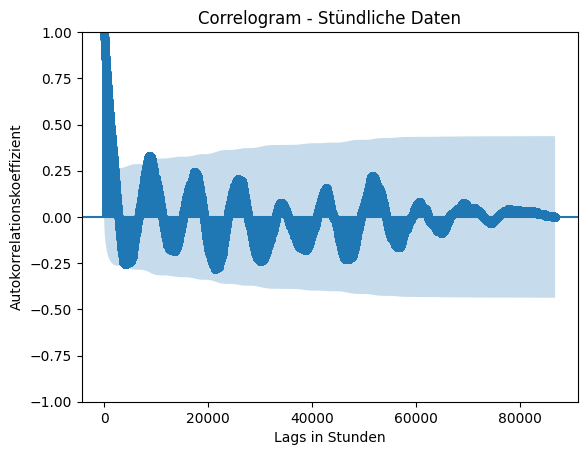

In [26]:
# Anzahl der Lags
lags = len(water_raw["Sealevel"])-1

# Berechnung und Plot der Autokorrelationsfunktion
sm.graphics.tsa.plot_acf(water_raw["Sealevel"], lags=lags, title="Correlogram - Stündliche Daten")
plt.xlabel("Lags in Stunden")
plt.ylabel("Autokorrelationskoeffizient")
plt.show()

Um das ganze etwas klarer zu machen und auch mehr die saisonalität zu sehen, habe ich die Daten auf monatliche Intervalle gemittelt.

In [27]:
water_monthly = water_raw.resample('ME', on='Observed_date').mean()

<span style="background-color:yellow">Plot optimiert</span>

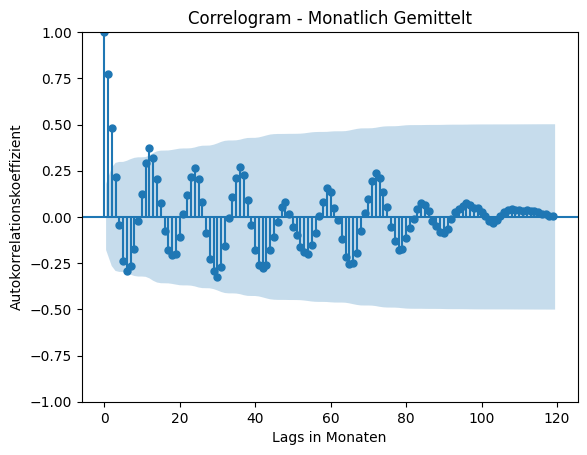

In [28]:
# Autokorrelationsfunktion für monatliche Daten
lags = len(water_monthly)-1
sm.graphics.tsa.plot_acf(water_monthly["Sealevel"], lags=lags, title="Correlogram - Monatlich Gemittelt")
plt.xlabel("Lags in Monaten")
plt.ylabel("Autokorrelationskoeffizient")
plt.show()

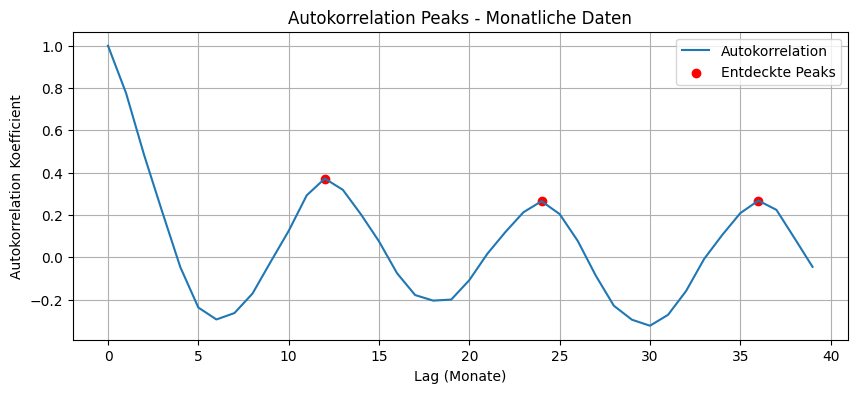

Geschätzte Periodendauer: 12.0 Monate (~1.00 Jahre)


In [33]:
# Periodizität der Daten aufzeigen

# Autokorrelation für monatliche Daten
acf_values = sm.tsa.stattools.acf(water_monthly["Sealevel"], nlags=lags)
lags_array = np.arange(len(acf_values))

# Peaks finden (ausser bei Lag = 0)
peaks, _ = find_peaks(acf_values, height=0.2)

plt.figure(figsize=(10,4))
plt.plot(lags_array, acf_values, label='Autokorrelation')
plt.scatter(lags_array[peaks], acf_values[peaks], color='red', label='Entdeckte Peaks')
plt.title("Autokorrelation Peaks - Monatliche Daten")
plt.xlabel("Lag (Monate)")
plt.ylabel("Autokorrelation Koefficient")
plt.grid(True)
plt.legend()
plt.show()

# Periodendauer in Monaten
if len(peaks) > 1:
    period_months = np.mean(np.diff(peaks))
    print(f"Geschätzte Periodendauer: {period_months:.1f} Monate (~{period_months/12:.2f} Jahre)")

<span style="background-color:yellow">
Im Auto-Korrelationsdiagramm sieht man nun, dass nach ca. 12 Monaten die Korrelation wieder sehr hoch ist, was auf eine jährliche Saisonalität hinweist. Dies wird auch erkenntlich, wenn man nach den höchsten Punkten (Peaks) im Diagramm sucht. Die Periodendauer wird dabei auf 12 errechnet, was durchaus Sinn ergibt. Um das Ganze noch etwas einfacher darzustellen, kann mach auch die Daten in 4 Quartale pro Jahr aufteilen. Dies schwächt natürlich die Genauigkeit etwas ab, macht das Muster aber noch klarer ersichtlich.
</span>

<span style="background-color:yellow">Plot optimiert</span>

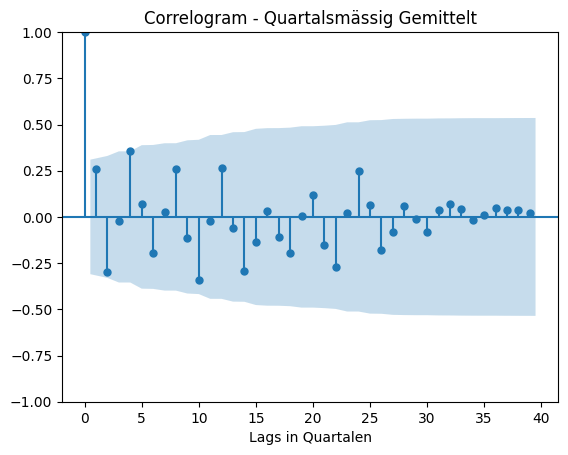

In [30]:
water_quarterly = water_raw.resample('QE', on='Observed_date').mean()

# Autokorrelationsfunktion für monatliche Daten
lags = len(water_quarterly)-1
sm.graphics.tsa.plot_acf(water_quarterly["Sealevel"], lags=lags, title="Correlogram - Quartalsmässig Gemittelt")
plt.xlabel("Lags in Quartalen")
plt.show()

Hier sieht man noch genauer, jedes Vierte Quartal weisst wieder eine höhere Korrelation auf. Nach 4 Jahren ist die Korrelation in allen Plots nahe bei 0. Wenn die jeweils 4 Aufeinanderfolgende Jahre betrachtet werden, sieht man, dass diese oft unterschiedlich zu anderen 4 Jahreszeiträumen sind. Wahrscheinlich hebt sich dieser Effekt im Anschluss bei 5 und 6 Jährigen Zeiträumen wieder etwas auf.

## Day 5
### Problemstellung

Die wiederholenden Muster in den Daten sind wichtig zu verstehen. Es ist enorm wichtig, diese Muster zu erkennen, um Vorhersagen über zukünftige Ereignisse treffen zu können. In diesem Fall muss bei der Planung von Bauprojekten wie Brücken oder Hafenanlagen der Wasserstand berücksichtigt werden. Und dies sollte für alle Jahreszeiten und nicht nur für den Durchschnittswasserstand über das Jahr hinweg geschehen. Ansonsten könnten die Brücken im Frühling/Sommer zu niedrig sein oder die Hafenanlagen im Herbst/Winter zu hoch. Zudem ist wichtig zu erkennen, dass die Wasserstände von Jahr zu Jahr über mehrere Jahre hinweg zwar ähnlich sind, aber nicht Identisch. Beispielsweise ist bei Vier Jahren in folge fast keine Autokorrelation mehr vorhanden. Es muss also beim Bau auch darauf geachtet werden, dass die Wasserstände von Jahr zu Jahr etwas variieren können.

## Day 6

### Observation
Die Autokorrelationsanalyse zeigt deutlich, dass nach etwa 12 Monaten eine starke Korrelation besteht. Das bestätigt den saisonalen Jahreszyklus im Wasserstand, der für Hafen- und Brückenplanung besonders relevant ist. Gleichzeitig fällt auf, dass sich die Autokorrelation nach 4 Jahren fast auf null reduziert, was auf natürliche Variabilität zwischen den Jahren hinweist.

### Interpretation
Für den Use Case bedeutet dies, dass Planungen nicht nur auf einem Jahresmittel basieren dürfen. Konstruktionen müssen Schwankungen zwischen verschiedenen Jahren berücksichtigen, da die Wiederholbarkeit über längere Zeiträume abnimmt. Eine reine Orientierung am Durchschnittswert könnte zu Fehlplanungen führen, z. B. zu niedrig bemessenen Brücken im Frühjahr.

### Diskussion
Die Ergebnisse sind im Kontext des Anwendungsfalls sehr wertvoll: Einerseits kann die jährliche Saisonalität klar für Prognosen genutzt werden, andererseits zeigen die niedrigen Korrelationen nach mehreren Jahren, dass die Variabilität zusätzliche Sicherheitsreserven in der Bauplanung notwendig macht. Kritisch zu hinterfragen ist, ob externe Einflüsse (z. B. Klimawandel, Niederschläge) die Korrelation langfristig weiter schwächen dies ist ein Aspekt, der in zukünftigen Analysen berücksichtigt werden muss.

### Methodenwahl
Ich habe die Autokorrelationsfunktion (ACF) gewählt, da sie eine etablierte Methode ist, um periodische Muster in Zeitreihen zu erkennen. Sie ist besonders geeignet für saisonale Daten, wie Wasserstände, da sie Abhängigkeiten über Monate und Jahre hinweg direkt sichtbar macht. Alternativen wie Fourier-Analysen wären ebenfalls möglich gewesen, fokussieren aber stärker auf Frequenzen, während ACF die Zeitabhängigkeit klarer darstellt.

### Parameterwahl
Ich habe die Daten auf monatliche und quartalsweise Intervalle gemittelt. Dadurch werden kurzfristige Schwankungen (z. B. Wetter oder Gezeiten) geglättet und der saisonale Zyklus tritt klarer hervor. Lags bis zur Länge der Zeitreihe wurden berücksichtigt, um auch mehrjährige Muster sichtbar zu machen. Die Quartalsbetrachtung wurde gewählt, weil sie einen guten Kompromiss zwischen Glättung und Erhalt saisonaler Details darstellt. Diese Quartalsbetrachtung ist im Rückblick auf das vorhergehende Notebook und die dortige Erkenntniss, dass eine Abtastrate von 3 Monaten Sinnvoll ist, entstanden.

## Day 7

### Use Case
Im Frühjahr steigt der Wasserstand im St.-Lawrence-Strom stark an, weil Schneeschmelze und erhöhte Zuflüsse einsetzen. Für die Schifffahrt, den Hochwasserschutz und die Hafenplanung ist es wichtig, den Beginn dieser Periode zu erkennen und zu vergleichen, wann sie in verschiedenen Jahren auftritt.

### Auswahl des Snippets
Als Referenz habe ich den Zeitraum vom 15. Februar bis 15. Mai 2017 gewählt. Dieser Zeitraum umfasst den typischen Anstieg des Wasserstands im Frühling und den Beginn des Sommers. Im Jahr 2017 war der Anstieg besonders ausgeprägt, dies ist gut, da wir vor allem sehr hohe Wasserstände erkennen wollen. Bei den anderen Jahren wird dann jeweils der Zeitraum zwischen Januar und Juni untersucht, um ähnliche Muster zu finden. Über das gesamte Signal wird eine gleitende Pearson-Korrelation mit dem Snippet berechnet. So können ähnliche Wasserstandsmuster in anderen Jahren erkannt werden. Für jedes Jahr wird der Zeitpunkt mit der höchsten Korrelation ausgewählt, um die besten Übereinstimmungen zu identifizieren.

Yearly best matches (Jan-Jun):
2015-05-24 0.662
2016-01-01 0.915
2017-02-15 1.0
2018-03-06 0.585
2019-02-24 0.899
2020-01-21 0.879
2021-05-18 0.622
2022-01-29 0.872
2023-02-15 0.878
2024-02-17 0.676


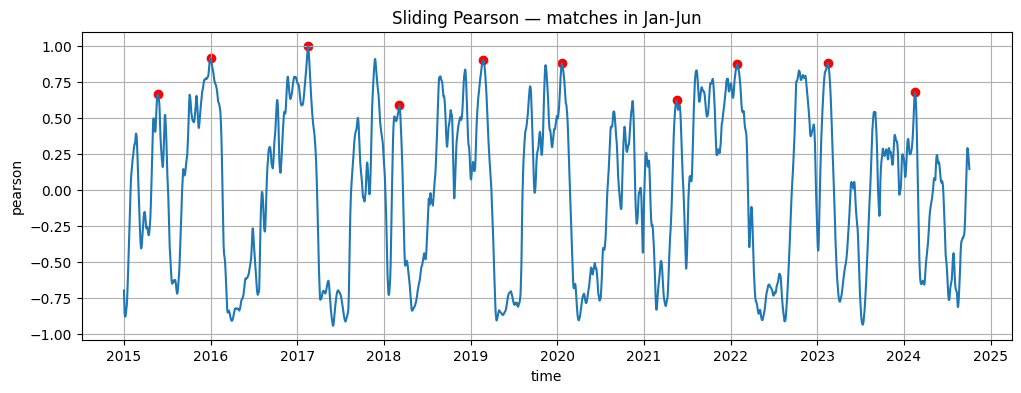

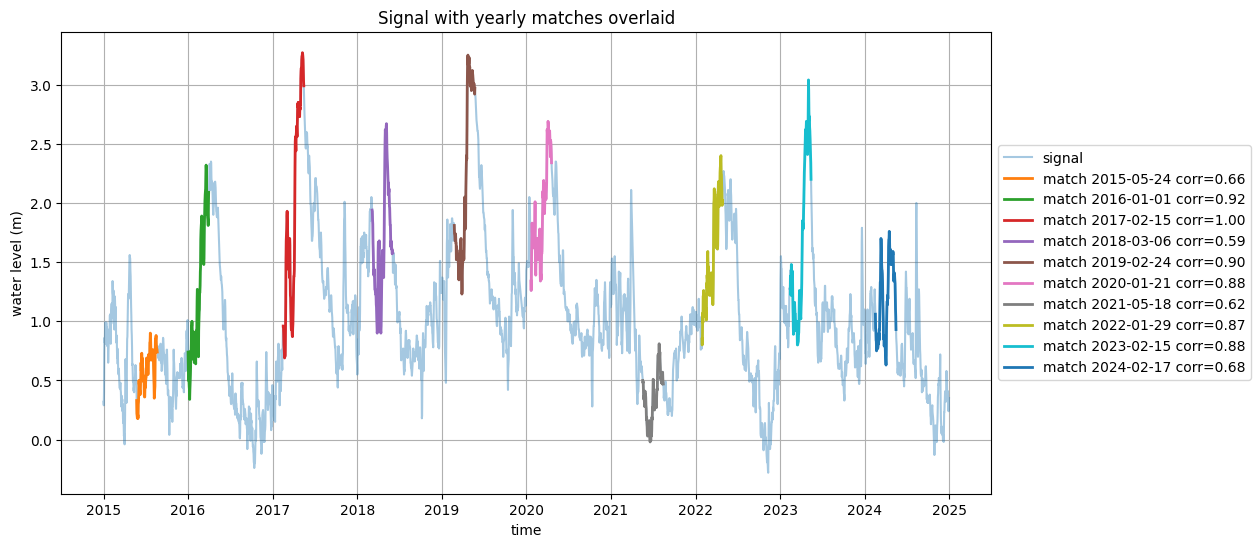

In [31]:
# prepare daily signal
sig = water_raw.set_index('Observed_date')['Sealevel'].asfreq('D').interpolate(limit=16)

# 1) choose snippet (Referenzjahr)
snippet = sig.loc['2017-02-15':'2017-05-15'].copy()

# 2) prepare data
x = sig.values.astype(float)
t = snippet.values.astype(float)
L = len(t)

# 3) compute sliding Pearson
dot_valid = correlate(x, t, mode='valid')  # length N-L+1
s = pd.Series(x, index=sig.index)
mean_x = s.rolling(window=L).mean().to_numpy()[L-1:]
std_x  = s.rolling(window=L).std(ddof=0).to_numpy()[L-1:]
mean_t = np.mean(t)
std_t = np.std(t)
eps = 1e-8
pearson = (dot_valid - L * mean_x * mean_t) / (L * (std_x * std_t + eps))

timestamps_valid = sig.index[:len(pearson)]

# 4) pick top match per year in Jan-Jun window
matches = []
for y in range(sig.index.year.min(), sig.index.year.max()+1):
    mask_year = (timestamps_valid.year == y) & (timestamps_valid.month >= 1) & (timestamps_valid.month <= 6)
    if mask_year.any():
        idxs = np.where(mask_year)[0]
        best_idx = idxs[np.argmax(pearson[idxs])]
        matches.append((timestamps_valid[best_idx], pearson[best_idx]))

matches = [m for m in matches if m[1] > 0.2]  # optional absolute filter
print("Yearly best matches (Jan-Jun):")
for t, c in matches:
    print(t.date(), round(c,3))

# 5) plot pearson with yearly markers
plt.figure(figsize=(12,4))
plt.plot(timestamps_valid, pearson, label='pearson')
for t, c in matches:
    plt.scatter(t, c, color='red')
plt.title('Sliding Pearson — matches in Jan-Jun')
plt.xlabel('time'); plt.ylabel('pearson'); plt.grid(); plt.show()

# 6) overlay example: show match overlays for a few years
plt.figure(figsize=(12,6))
plt.plot(sig.index, sig.values, alpha=0.4, label='signal')
for t,c in matches:
    start = sig.index.get_loc(t)
    end = start + L
    plt.plot(sig.index[start:end], sig.values[start:end], linewidth=2, label=f'match {t.date()} corr={c:.2f}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Signal with yearly matches overlaid')
plt.xlabel('time'); plt.ylabel('water level (m)'); plt.grid()
plt.show()

Auf dem Plot sieht man gut, dass die Wasseranstiege im Frühling in den verschiedenen Jahren gut erkannt werden. Gerade in den Jahren, in dennen ein starker Anstieg stattgefunden hat, ist die Korrelation sowie die Übereinstimmung mit dem Snippet besonders hoch. Dies macht auch sinn, da dies im Jahr 2017 auch der Fall war. In den Jahren, in denen der Anstieg weniger stark war, ist die Korrelation entsprechend geringer und passt Teilweise schlechter zum Snippet. Da aber gerade hohe Wasserstände relevant sind, ist dies in Ordnung.

## Day 8

### Änderung der Amplitude
Die Schneeschmelze und der damit verbundene Wasserstand im St.-Lawrence-Strom können von Jahr zu Jahr variieren. Faktoren wie die Menge des gefallenen Schnees im Winter, die Temperaturentwicklung im Frühling und Niederschlagsmuster beeinflussen die Höhe des Wasserstands. Das Muster bleibt jedoch ähnlich, nur die höhe der Ausschläge ändert sich.

### Leichte Zeitliche Verschiebung (Phase shift)
Die Schmelze kann früher oder später einsetzen, abhängig von den Wetterbedingungen. Ein wärmerer Frühling kann zu einem früheren Anstieg des Wasserstands führen, während ein kälterer Frühling den Anstieg verzögern kann. Dies führt zu einer zeitlichen Verschiebung des Musters ohne das grundsätzliche Muster zu verändern.

Yearly best matches (after transformation):
2015-05-24 0.662
2016-02-01 0.628
2017-02-15 1.0
2018-03-06 0.585
2019-02-24 0.899
2020-02-01 0.729
2021-05-18 0.622
2022-02-01 0.848
2023-02-15 0.878
2024-02-17 0.676


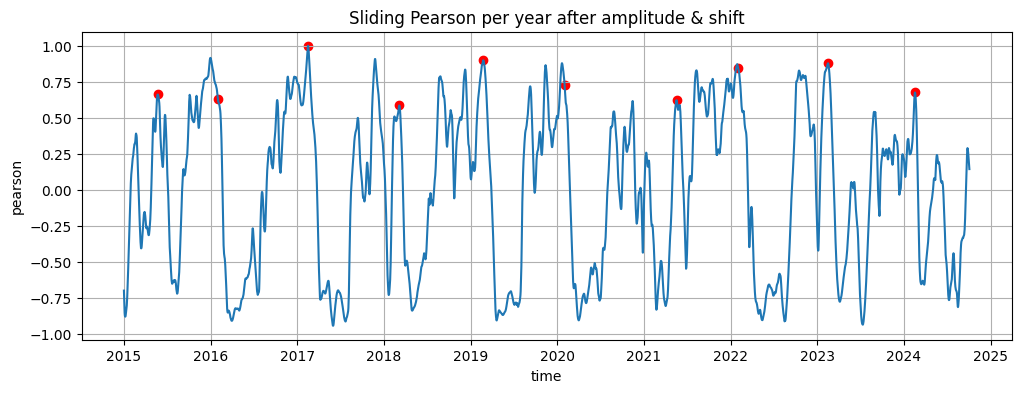

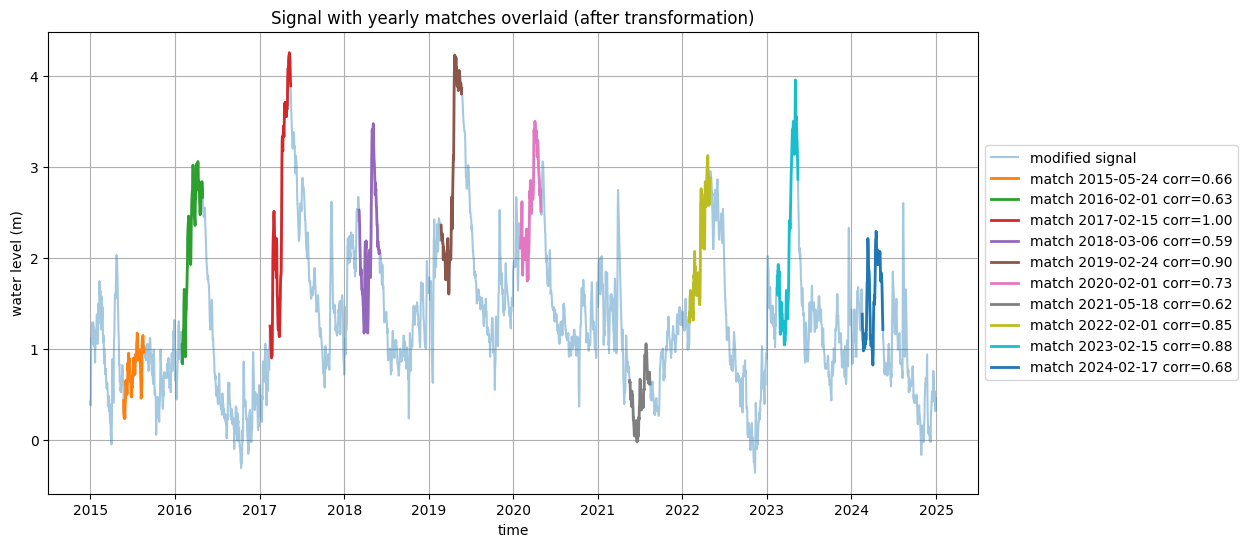

In [32]:
# Original snippet (Referenz)
snippet = sig.loc['2017-02-15':'2017-05-15'].copy()
t = snippet.values.astype(float)
L = len(t)

# 1) Transformationen: amplitude scaling + phase shift
amplitude_factor = 1.3      # 30% höhere Schneeschmelze
shift_days = 7              # 1 Woche später

sig_modified = sig.copy()
sig_modified.iloc[shift_days:] = sig_modified.iloc[shift_days:]  # simple shift
sig_modified = sig_modified * amplitude_factor  # scale amplitude

# 2) Compute sliding Pearson cross-correlation
x = sig_modified.values.astype(float)
dot_valid = correlate(x, t, mode='valid')
s = pd.Series(x, index=sig_modified.index)
mean_x = s.rolling(window=L).mean().to_numpy()[L-1:]
std_x  = s.rolling(window=L).std(ddof=0).to_numpy()[L-1:]
mean_t = np.mean(t)
std_t = np.std(t)
eps = 1e-8
pearson = (dot_valid - L * mean_x * mean_t) / (L * (std_x * std_t + eps))
timestamps_valid = sig_modified.index[:len(pearson)]

# 3) Top match per year in Feb-Jun window
matches_modified = []
for y in range(sig_modified.index.year.min(), sig_modified.index.year.max()+1):
    mask_year = (timestamps_valid.year == y) & (timestamps_valid.month >= 2) & (timestamps_valid.month <= 6)
    if mask_year.any():
        idxs = np.where(mask_year)[0]
        best_idx = idxs[np.argmax(pearson[idxs])]
        matches_modified.append((timestamps_valid[best_idx], pearson[best_idx]))

matches_modified = [m for m in matches_modified if m[1] > 0.2]  # optional absolute threshold

print("Yearly best matches (after transformation):")
for t, c in matches_modified:
    print(t.date(), round(c,3))

# 4) Visualize Pearson with yearly markers
plt.figure(figsize=(12,4))
plt.plot(timestamps_valid, pearson, label='pearson')
for t, c in matches_modified:
    plt.scatter(t, c, color='red')
plt.title('Sliding Pearson per year after amplitude & shift')
plt.xlabel('time'); plt.ylabel('pearson'); plt.grid(); plt.show()

# 5) Overlay example: show match overlays for all years
plt.figure(figsize=(12,6))
plt.plot(sig_modified.index, sig_modified.values, alpha=0.4, label='modified signal')
for t, c in matches_modified:
    start = sig_modified.index.get_loc(t)
    end = start + L
    plt.plot(sig_modified.index[start:end], sig_modified.values[start:end], linewidth=2, label=f'match {t.date()} corr={c:.2f}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Signal with yearly matches overlaid (after transformation)')
plt.xlabel('time'); plt.ylabel('water level (m)'); plt.grid()
plt.show()

Auch nach den beiden Transformationen (Amplitude und Phase) ist die Korrelation immer noch relativ hoch, was zeigt, dass die grundlegenden Muster im Wasserstand erhalten bleiben. Dies ist wichtig für die Planung, da es bedeutet, dass trotz natürlicher Variabilität ähnliche Muster erkannt und genutzt werden können. Die Korrelationen sind teilweise gleich, teilweise etwas geringer oder höher. Man sieht aber, dass die Muster selbst nicht verändert hat. Die Zeitliche Verschiebung hat bis auf die von mir gesetzten Grenzen keinen einfluss auf die Korrelation und die Amplitudenänderung hat nur einen geringen Einfluss da in der Korrelation die Amplitude ja sowieso normalisiert wird.

## Day 9
Die Cross-Korrelation hat gezeig, dass sich die Wasserstandsmuster im St.-Lawrence-Strom von Jahr zu Jahr wiederholen, aber auch Variabilität aufweisen. Die Methode war effektiv, um ähnliche Muster zu erkennen, selbst wenn sie in der Zeit verschoben oder in der Amplitude verändert waren. Für den Use Case der Hafen und Schiffahrtsplanung ist dies besonders relevant, da es ermöglicht, saisonale Anstiege im Wasserstand zu identifizieren und zu vergleichen. Eine Limitation würde dann entstehen, wenn extreme Wetterereignisse, langfristige Klimaveränderungen oder anpassungen am Flussverlauf wie zum Beipiel durch Dämme die Muster stark verändern. In solchen Fällen könnte die Cross-Korrelation welche hier verwendet wurde weniger zuverlässig sein und es müssten neue Messungen und Berechnungen durchgeführt werden.